In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Usage,Timestep,InventoryCode,Domain
0,93,1,0,B
1,94,2,0,B
2,94,3,0,B
3,94,4,0,B
4,94,5,0,B


In [4]:
train.isnull().sum()

Usage            0
Timestep         0
InventoryCode    0
Domain           0
dtype: int64

In [5]:
train.describe()

,Usage,Timestep,InventoryCode
count,6.190000e+04,61900.000000,61900.000000
mean,9.636666e+11,50.272213,114.322294
std,3.790262e+13,32.356858,72.624913
min,0.000000e+00,1.000000,0.000000
25%,1.300000e+01,23.000000,51.000000
50%,4.000000e+01,46.000000,105.000000
75%,7.500000e+01,77.000000,177.000000
max,2.668135e+15,120.000000,249.000000


In [6]:
train['Domain'].value_counts()

A        30000
B        23500
C[i]      4200
C[ii]     4200
Name: Domain, dtype: int64

In [7]:
trainA = train[train['Domain']=='A']
trainB = train[train['Domain']=='B']
trainCi = train[train['Domain']=='C[i]']
trainCii = train[train['Domain']=='C[ii]']

In [8]:
trainA['InventoryCode'].value_counts()

239    120
228    120
181    120
165    120
149    120
133    120
117    120
101    120
85     120
69     120
53     120
37     120
21     120
5      120
244    120
212    120
227    120
196    120
180    120
164    120
148    120
132    120
116    120
100    120
84     120
68     120
52     120
36     120
20     120
4      120
      ... 
171    120
217    120
155    120
139    120
123    120
107    120
91     120
75     120
59     120
43     120
27     120
11     120
234    120
218    120
202    120
186    120
170    120
154    120
138    120
122    120
106    120
90     120
74     120
58     120
42     120
26     120
10     120
249    120
233    120
0      120
Name: InventoryCode, dtype: int64

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ecff45090>]],
      dtype=object)

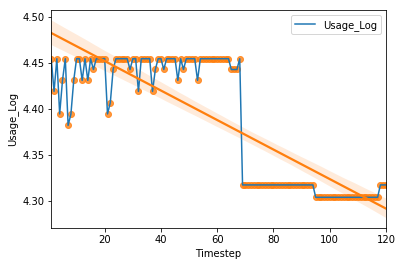

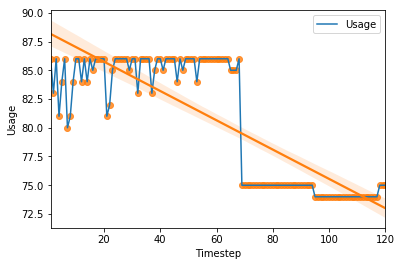

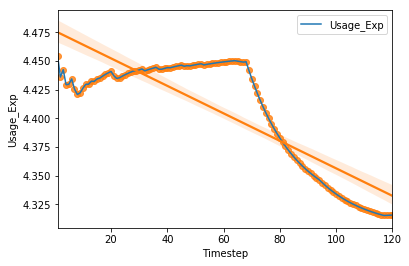

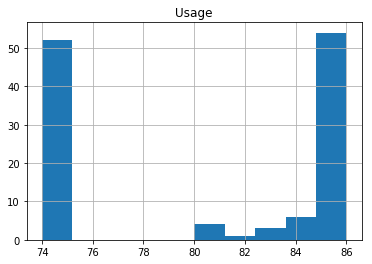

In [11]:
trainA0 = trainA[trainA['InventoryCode']==0]
trainA0['Usage_Log'] = np.log(trainA0['Usage'])
trainA0['Usage_Exp'] = pd.ewma(trainA0['Usage_Log'], halflife=12)
trainA0.plot(x='Timestep',y='Usage_Log')
sns.regplot(x='Timestep',y='Usage_Log',data=trainA0)
trainA0.plot(x='Timestep',y='Usage')
sns.regplot(x='Timestep',y='Usage',data=trainA0)
trainA0.plot(x='Timestep',y='Usage_Exp')
sns.regplot(x='Timestep',y='Usage_Exp',data=trainA0)
trainA0.hist(column='Usage')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new

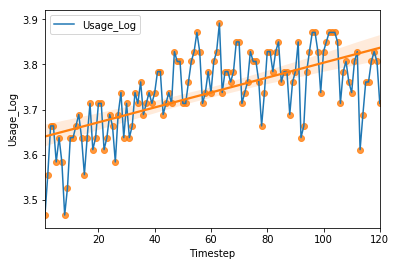

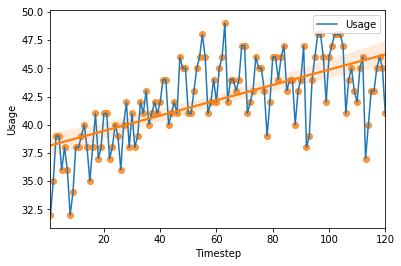

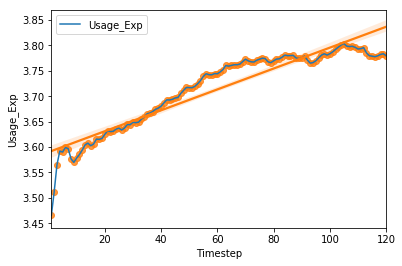

In [16]:
trainA1 = trainA[trainA['InventoryCode']==1]
trainA1['Usage_Log'] = np.log(trainA1['Usage'])
trainA1['Usage_Exp'] = pd.ewma(trainA1['Usage_Log'], halflife=12)
trainA1.plot(x='Timestep',y='Usage_Log')
sns.regplot(x='Timestep',y='Usage_Log',data=trainA1)
trainA1.plot(x='Timestep',y='Usage')
sns.regplot(x='Timestep',y='Usage',data=trainA1)
trainA1.plot(x='Timestep',y='Usage_Exp')
sns.regplot(x='Timestep',y='Usage_Exp',data=trainA1)

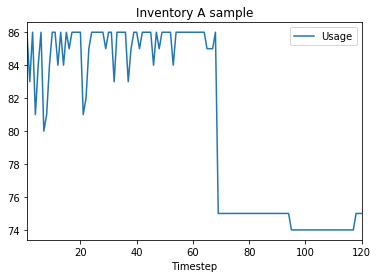

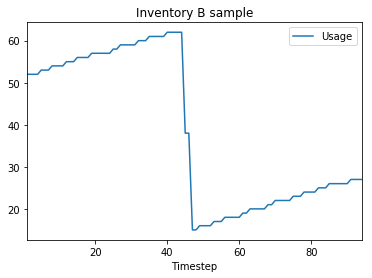

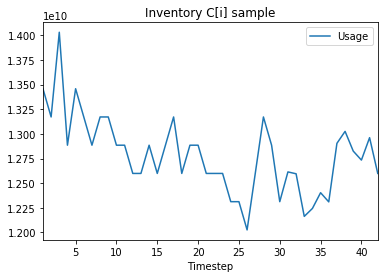

In [52]:
trainA2 = trainA[trainA['InventoryCode']==0]
trainA2.plot(x='Timestep',y='Usage',title='Inventory A sample')
trainB2 = trainB[trainB['InventoryCode']==6]
trainB2.plot(x='Timestep',y='Usage',title='Inventory B sample')
trainCi2 = trainCi[trainCi['InventoryCode']==6]
trainCi2.plot(x='Timestep',y='Usage',title='Inventory C[i] sample')

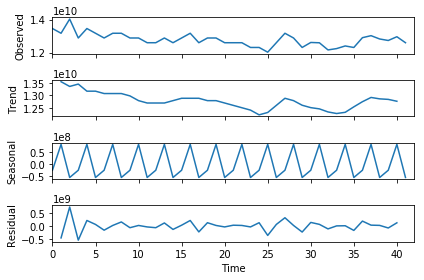

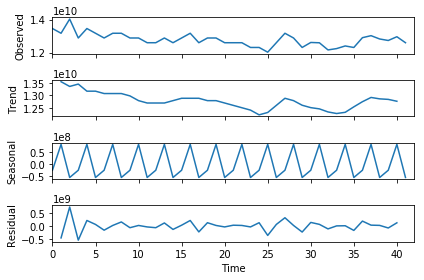

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = trainCi2['Usage']
result = seasonal_decompose(np.asarray(series), freq=3)
result.plot()

In [30]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [31]:
train_log = train

In [33]:
train_log['Usage_Log'] = np.log(train_log['Usage'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


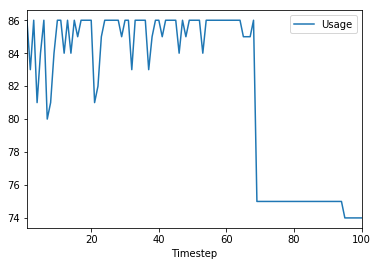

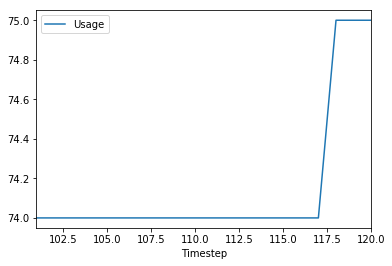

In [49]:
trainA[:100].plot(x='Timestep',y='Usage')
trainA[100:120].plot(x='Timestep',y='Usage')

14642299662.808268


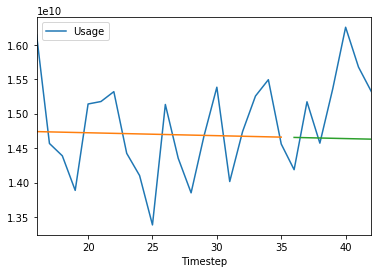

In [51]:
trainCi[15:42].plot(x='Timestep',y='Usage')
import statsmodels.api as sm
model = sm.OLS(trainCi[15:35]['Usage'],sm.add_constant(trainCi[15:35]['Timestep'])).fit()
predictions_train = model.predict(sm.add_constant(trainCi[15:35]['Timestep']))
predictions_test = model.predict(sm.add_constant(trainCi[35:42]['Timestep']))
plt.plot(trainCi[15:35]['Timestep'],predictions_train)
plt.plot(trainCi[35:42]['Timestep'],predictions_test)
from sklearn.metrics import mean_absolute_error
print mean_absolute_error(trainCi[35:42]['Timestep'],predictions_test)

In [78]:
public_test = pd.read_csv('private_test_x.csv')
public_test_submission = pd.read_csv('private_test_y.csv')

In [79]:
public_testB = public_test[public_test['Domain']=='B']
public_testCii = public_test[public_test['Domain']=='C[ii]']
public_testCi = public_test[public_test['Domain']=='C[i]']
public_testA = public_test[public_test['Domain']=='A']

In [48]:
import statsmodels.api as sm
submission = []

timestepB_train = []
timestepB_test = []
for k in range(1,76):
    timestepB_train.append(k)
for k in range(76,95):
    timestepB_test.append(k)
for k in range(public_testB.shape[0]/75):
    model = sm.OLS(public_testB[k*75:(k+1)*75]['Usage'],sm.add_constant(timestepB_train)).fit()
    predictions = model.predict(sm.add_constant(timestepB_test))
    for p in predictions:
        submission.append(p)

timestepCii_train = []
timestepCii_test = []
for k in range(1,36):
    timestepCii_train.append(k)
for k in range(36,43):
    timestepCii_test.append(k)
for k in range(public_testCii.shape[0]/35):
    model = sm.OLS(public_testCii[k*35:(k+1)*35]['Usage'],sm.add_constant(timestepCii_train)).fit()
    predictions = model.predict(sm.add_constant(timestepCii_test))
    for p in predictions:
        submission.append(p)

timestepCi_train = []
timestepCi_test = []
for k in range(1,36):
    timestepCi_train.append(k)
for k in range(36,43):
    timestepCi_test.append(k)
for k in range(public_testCi.shape[0]/35):
    model = sm.OLS(public_testCi[k*35:(k+1)*35]['Usage'],sm.add_constant(timestepCi_train)).fit()
    predictions = model.predict(sm.add_constant(timestepCi_test))
    for p in predictions:
        submission.append(p)

timestepA_train = []
timestepA_test = []
for k in range(1,101):
    timestepA_train.append(k)
for k in range(101,121):
    timestepA_test.append(k)
for k in range(public_testA.shape[0]/100):
    model = sm.OLS(public_testA[k*100:(k+1)*100]['Usage'],sm.add_constant(timestepA_train)).fit()
    predictions = model.predict(sm.add_constant(timestepA_test))
    for p in predictions:
        submission.append(p)

In [49]:
public_test_submission['Usage'] = submission
public_test_submission
public_test_submission.to_csv('sub1.csv', index=False)

In [50]:
public_test_submission

,Usage,Timestep,InventoryCode,Domain
0,35.218018,1,0,B
1,34.687264,2,0,B
2,34.156510,3,0,B
3,33.625756,4,0,B
4,33.095002,5,0,B
5,32.564248,6,0,B
6,32.033495,7,0,B
7,31.502741,8,0,B
8,30.971987,9,0,B
9,30.441233,10,0,B


In [94]:
usage_shift1 = []
for i in range(len(public_testB)):
    if (i%75==0):
        usage_shift1.append(public_testB.iloc[i]['Usage'])
    else:
        usage_shift1.append(public_testB.iloc[i-1]['Usage'])
public_testB['Usage_1'] = usage_shift1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [96]:
usage_shift1 = []
for i in range(len(public_testCii)):
    if (i%35==0):
        usage_shift1.append(public_testCii.iloc[i]['Usage'])
    else:
        usage_shift1.append(public_testCii.iloc[i-1]['Usage'])
public_testCii['Usage_1'] = usage_shift1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [97]:
usage_shift1 = []
for i in range(len(public_testCi)):
    if (i%35==0):
        usage_shift1.append(public_testCi.iloc[i]['Usage'])
    else:
        usage_shift1.append(public_testCi.iloc[i-1]['Usage'])
public_testCi['Usage_1'] = usage_shift1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [98]:
usage_shift1 = []
for i in range(len(public_testA)):
    if (i%100==0):
        usage_shift1.append(public_testA.iloc[i]['Usage'])
    else:
        usage_shift1.append(public_testA.iloc[i-1]['Usage'])
public_testA['Usage_1'] = usage_shift1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [124]:
public_testB

,Usage,Timestep,InventoryCode,Domain,Usage_1
0,8,1,0,B,8
1,8,2,0,B,8
2,8,3,0,B,8
3,8,4,0,B,8
4,8,5,0,B,8
5,8,6,0,B,8
6,8,7,0,B,8
7,8,8,0,B,8
8,8,9,0,B,8
9,8,10,0,B,8


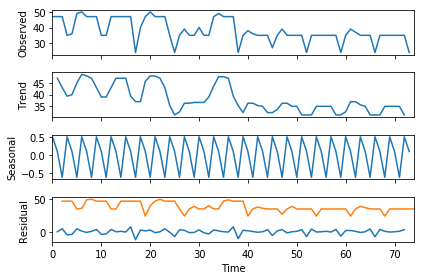

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = public_testB[76:150]['Usage']
result = seasonal_decompose(np.asarray(series), freq=3)
result.plot()
plt.plot(public_testB[76:150]['Timestep'],public_testB[76:150]['Usage'])

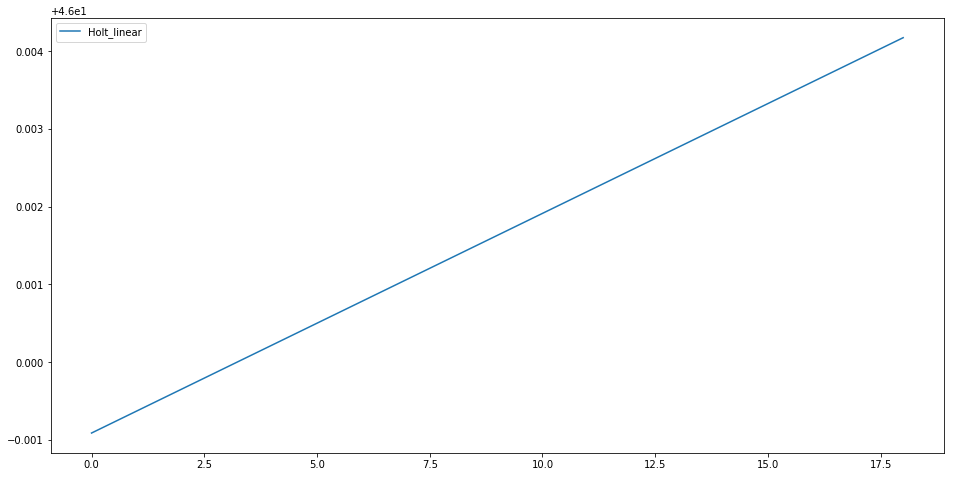

In [85]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt
series = public_testB[0:75]['Usage']
fit1 = Holt(np.asarray(series)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
result = fit1.forecast(19)

plt.figure(figsize=(16,8))
plt.plot(result, label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [94]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, Holt
submission = []

timestepB_train = []
timestepB_test = []
for k in range(1,76):
    timestepB_train.append(k)
for k in range(public_testB.shape[0]/75):
    series = public_testB[k*75:(k+1)*75]['Usage']
    fit1 = Holt(np.asarray(series)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
    result = fit1.forecast(19)
    for r in result:
        submission.append(r)

timestepCii_train = []
timestepCii_test = []
for k in range(1,36):
    timestepCii_train.append(k)
for k in range(public_testCii.shape[0]/35):
    series = public_testCii[k*35:(k+1)*35]['Usage']
    fit1 = Holt(np.asarray(series)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
    result = fit1.forecast(7)
    for r in result:
        submission.append(r)

timestepCi_train = []
timestepCi_test = []
for k in range(1,36):
    timestepCi_train.append(k)
for k in range(public_testCi.shape[0]/35):
    series = public_testCi[k*35:(k+1)*35]['Usage']
    fit1 = Holt(np.asarray(series)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
    result = fit1.forecast(7)
    for r in result:
        submission.append(r)

timestepA_train = []
timestepA_test = []
for k in range(1,101):
    timestepA_train.append(k)
for k in range(public_testA.shape[0]/100):
    series = public_testA[k*100:(k+1)*100]['Usage']
    fit1 = Holt(np.asarray(series)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
    result = fit1.forecast(20)
    for r in result:
        submission.append(r)

In [95]:
public_test_submission['Usage'] = submission
public_test_submission
public_test_submission.to_csv('sub2.csv', index=False)

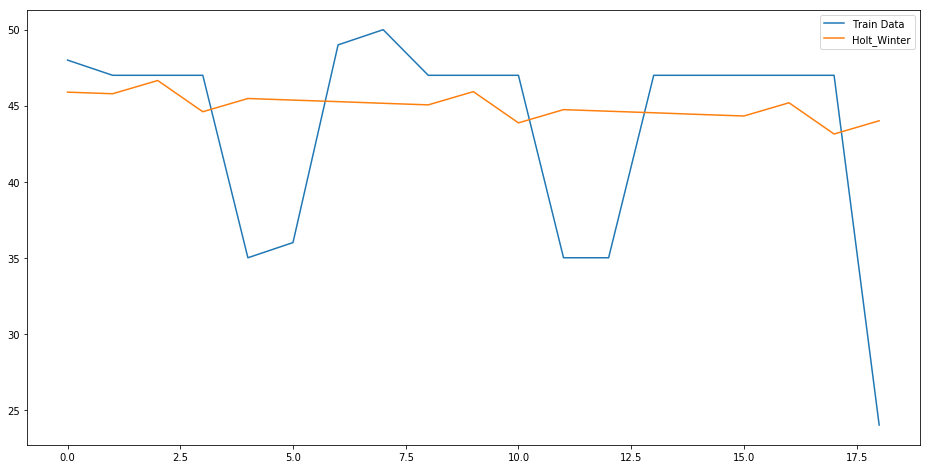

In [87]:
series = public_testB[0:75]['Usage']
fit1 = ExponentialSmoothing(np.asarray(series) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
result = fit1.forecast(19)
plt.figure(figsize=(16,8))
plt.plot(np.array(public_testB[75:94]['Usage']),label='Train Data')
plt.plot(result, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [97]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, Holt
submission = []

timestepB_train = []
timestepB_test = []
for k in range(1,76):
    timestepB_train.append(k)
for k in range(public_testB.shape[0]/75):
    series = public_testB[k*75:(k+1)*75]['Usage']
    fit1 = ExponentialSmoothing(np.asarray(series) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
    result = fit1.forecast(19)
    for r in result:
        submission.append(r)

timestepCii_train = []
timestepCii_test = []
for k in range(1,36):
    timestepCii_train.append(k)
for k in range(public_testCii.shape[0]/35):
    series = public_testCii[k*35:(k+1)*35]['Usage']
    fit1 = ExponentialSmoothing(np.asarray(series) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
    result = fit1.forecast(7)
    for r in result:
        submission.append(r)

timestepCi_train = []
timestepCi_test = []
for k in range(1,36):
    timestepCi_train.append(k)
for k in range(public_testCi.shape[0]/35):
    series = public_testCi[k*35:(k+1)*35]['Usage']
    fit1 = ExponentialSmoothing(np.asarray(series) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
    result = fit1.forecast(7)
    for r in result:
        submission.append(r)

timestepA_train = []
timestepA_test = []
for k in range(1,101):
    timestepA_train.append(k)
for k in range(public_testA.shape[0]/100):
    series = public_testA[k*100:(k+1)*100]['Usage']
    fit1 = ExponentialSmoothing(np.asarray(series) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
    result = fit1.forecast(20)
    for r in result:
        submission.append(r)

In [98]:
public_test_submission['Usage'] = submission
public_test_submission
public_test_submission.to_csv('sub3.csv', index=False)

In [59]:
from statsmodels.tsa.stattools import acf, pacf

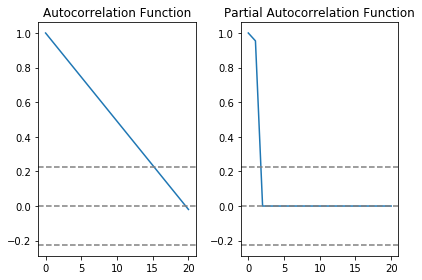

In [82]:
lag_acf = acf(np.asarray(public_testB[0:75]['Usage']), nlags=20)
lag_pacf = pacf(np.asarray(public_testB[0:75]['Usage']), nlags=20, method='ols')
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(np.asarray(public_testB[0:75]['Usage']))),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(np.asarray(public_testB[0:75]['Usage']))),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(np.asarray(public_testB[0:75]['Usage']))),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(np.asarray(public_testB[0:75]['Usage']))),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

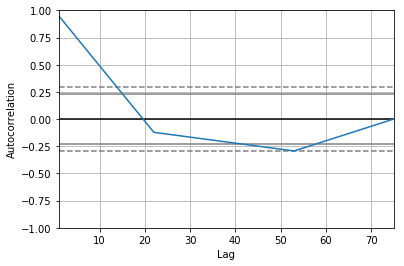

In [83]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(public_testB[0:75]['Usage'])

In [53]:
from statsmodels.tsa.arima_model import ARIMA

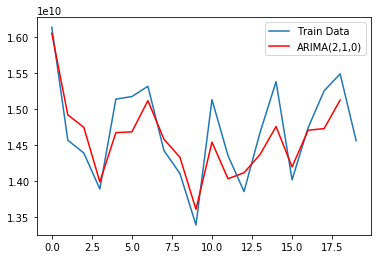

In [75]:
model = ARIMA(np.asarray(trainCi[15:35]['Usage']), order=(2, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(np.asarray(trainCi[15:35]['Usage']),label='Train Data')
plt.plot(np.asarray(trainCi[15:34]['Usage']) + results_ARIMA.fittedvalues, color='red',label='ARIMA(2,1,0)')
plt.legend(loc='best')
plt.show()

In [12]:
import cProfile

In [13]:
import bayesian_changepoint_detection.offline_changepoint_detection as offcd

Use scipy logsumexp().


In [14]:
from functools import partial

Q, P, Pcp = offcd.offline_changepoint_detection(np.asarray(trainA0['Usage']), partial(offcd.const_prior, l=(len(np.asarray(trainA0['Usage']))+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

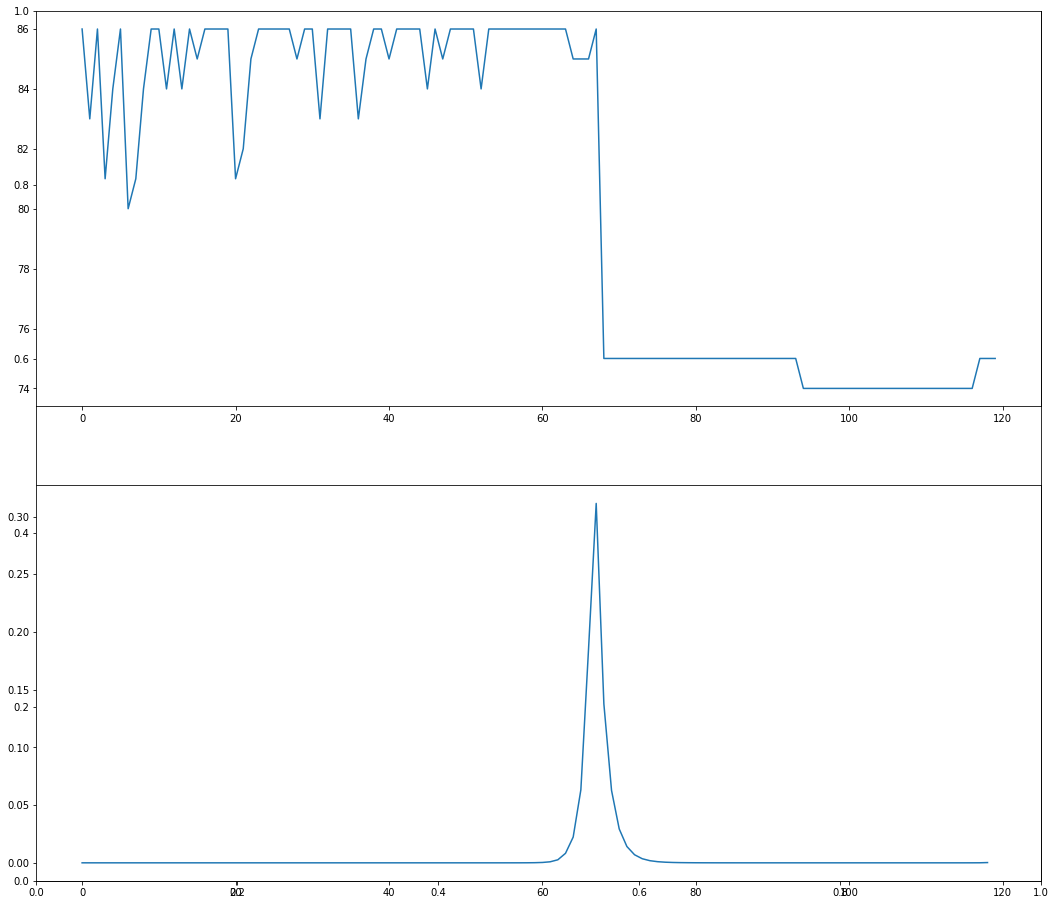

In [15]:
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.asarray(trainA0['Usage']))
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp).sum(0))

In [59]:
np.argmax(np.exp(Pcp).sum(0))

7

In [99]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, Holt
submission = []

timestepB_train = []
timestepB_test = []
for k in range(1,76):
    timestepB_train.append(k)
for k in range(public_testB.shape[0]/75):
    series = np.asarray(public_testB[k*75:(k+1)*75]['Usage'])
    Q, P, Pcp = offcd.offline_changepoint_detection(series, partial(offcd.const_prior, l=(len(series)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)
    changePoint = np.argmax(np.exp(Pcp).sum(0))
    if(changePoint<60):
        fit1 = ExponentialSmoothing(series[changePoint:] ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
    else:
        fit1 = ExponentialSmoothing(series[60:] ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
    result = fit1.forecast(19)
    for r in result:
        submission.append(r)

timestepCii_train = []
timestepCii_test = []
for k in range(1,36):
    timestepCii_train.append(k)
for k in range(public_testCii.shape[0]/35):
    series = public_testCii[k*35:(k+1)*35]['Usage']
    fit1 = ExponentialSmoothing(np.asarray(series) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
    result = fit1.forecast(7)
    for r in result:
        submission.append(r)

timestepCi_train = []
timestepCi_test = []
for k in range(1,36):
    timestepCi_train.append(k)
for k in range(public_testCi.shape[0]/35):
    series = public_testCi[k*35:(k+1)*35]['Usage']
    fit1 = ExponentialSmoothing(np.asarray(series) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
    result = fit1.forecast(7)
    for r in result:
        submission.append(r)

timestepA_train = []
timestepA_test = []
for k in range(1,100):
    timestepA_train.append(k)
for k in range(public_testA.shape[0]/100):
    try:
        series = np.asarray(public_testB[k*100:(k+1)*100]['Usage'])
        Q, P, Pcp = offcd.offline_changepoint_detection(series, partial(offcd.const_prior, l=(len(series)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)
        changePoint = np.argmax(np.exp(Pcp).sum(0))
        if(changePoint<80):
            fit1 = ExponentialSmoothing(series[changePoint:] ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
        else:
            fit1 = ExponentialSmoothing(series[80:] ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
        result = fit1.forecast(20)
        for r in result:
            submission.append(r)
    except:
        series = public_testA[k*100:(k+1)*100]['Usage']
        fit1 = ExponentialSmoothing(np.asarray(series) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
        result = fit1.forecast(20)
        for r in result:
            submission.append(r)

KeyboardInterrupt: 

In [69]:
public_test_submission['Usage'] = submission
public_test_submission
public_test_submission.to_csv('sub4.csv', index=False)

In [70]:
public_test_submission

,Usage,Timestep,InventoryCode,Domain
0,27.894541,1,0,B
1,27.884166,2,0,B
2,27.880214,3,0,B
3,27.884351,4,0,B
4,28.845409,5,0,B
5,28.889355,6,0,B
6,28.877016,7,0,B
7,28.861878,8,0,B
8,28.851503,9,0,B
9,28.847551,10,0,B


In [100]:
ensemble_xgb2 = pd.read_csv('sub2_xgb.csv')
ensemble3 = pd.read_csv('sub3.csv')

In [101]:
ensemble23 = 0.95*ensemble_xgb2['Usage'] + 0.05*ensemble3['Usage']
public_test_submission['Usage'] = ensemble23
public_test_submission
public_test_submission.to_csv('ensemble11.csv', index=False)

In [102]:
ensemble1 = pd.read_csv('sub1.csv')

In [87]:
ensemble123 = 0.99*ensemble23 + 0.01*ensemble1['Usage']
public_test_submission['Usage'] = ensemble123
public_test_submission
public_test_submission.to_csv('ensemble11.csv', index=False)